<a href="https://colab.research.google.com/github/tusharsgaidhane/Cardiovascular-Risk-Prediction/blob/main/PS_Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<b>Cardiovascular Risk Prediction<b/>

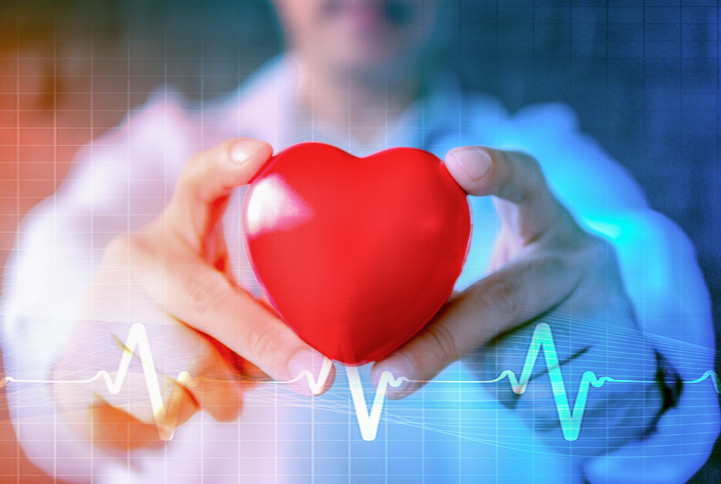

## **Introduction**

**Problem:** The World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk.

**Dataset**

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.


**Variables**

Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.


**Data Description**

**Demographic:**
* Sex: male or female("M" or "F")
* Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)




**Behavioral:**
* is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical( history):**
* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke(Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal)

**Medical(current)**
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous)

**Predict variable (desired target)**
* 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
#preprocessing
# from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# machine learning models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor


# Modelling Helpers
from sklearn.model_selection import train_test_split

# Evaluation metrics
from sklearn.metrics import r2_score as r2, mean_squared_error as mse, mean_absolute_error as mae
import math

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
hfdf = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Projects/3. UnS ML: Cardiovascular Risk Prediction/data_cardiovascular_risk.csv')

In [6]:
hfdf.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [7]:
hfdf.shape

(3390, 17)

In [8]:
hfdf.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [9]:
hfdf.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [10]:
hfdf.duplicated().sum()

0

It shows that there are no Duplicated Values present in the dataset.

In [11]:
missing_data = hfdf.isnull().sum()
total_percentage = (missing_data.sum()/hfdf.shape[0]) * 100
print(f'The total percentage of missing data is {round(total_percentage,2)}%')

The total percentage of missing data is 15.04%


In [12]:
# percentage of missing data per category
total = hfdf.isnull().sum().sort_values(ascending=False)
percent_total = (hfdf.isnull().sum()/hfdf.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
missing_data = missing[missing['Total']>0]
missing_data

,Total,Percentage
glucose,304,8.967552
education,87,2.566372
BPMeds,44,1.297935
totChol,38,1.120944
cigsPerDay,22,0.648968
BMI,14,0.412979
heartRate,1,0.029499


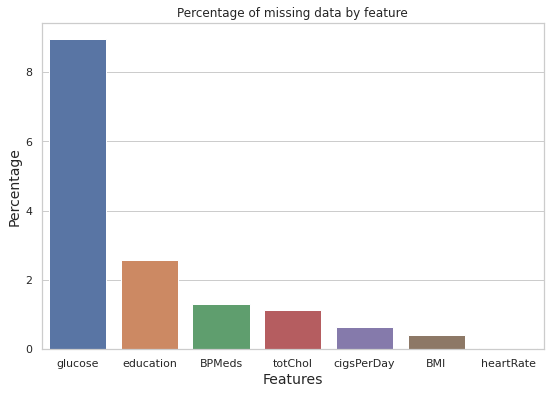

In [13]:
plt.figure(figsize=(9,6))
sns.set(style="whitegrid")
sns.barplot(x=missing_data.index, y=missing_data['Percentage'], data = missing_data)
plt.title('Percentage of missing data by feature')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.show()

At 8.96%, the blood glucose entry has the highest percentage of missing data. 

In [14]:
# Let us check the mode values of some of the features having missing values:
print('Mode Value of Glucose:', (hfdf["glucose"].mode())[0])
print('Mode Value of Cigarettes Consumed Per day:', (hfdf["cigsPerDay"].mode())[0])
print('Mode Value of Total Cholestrol:', (hfdf["totChol"].mode())[0])

Mode Value of Total Cholestrol: 240.0


In [15]:
# Filling missing values:

hfdf["glucose"].fillna((hfdf["glucose"].mode())[0], inplace=True)
hfdf["cigsPerDay"].fillna((hfdf["cigsPerDay"].mode())[0], inplace=True)
hfdf["totChol"].fillna((hfdf["totChol"].mode())[0], inplace=True)

In [16]:
# Let us check the percentage of null values we are left with now:
missing_data = hfdf.isnull().sum()
total_percentage = (missing_data.sum()/hfdf.shape[0]) * 100
print(f'The total percentage of missing data is {round(total_percentage,2)}%')

The total percentage of missing data is 4.31%


So, now we are left with only 4.31% of null values and the features which remained with null values, have very few missing entries. Thus, we can drop these null entries without losing alot of data.

In [17]:
hfdf.dropna(axis=0, inplace=True)
hfdf.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

Also, let's drop the column of "ID" as it is not contributing anything.

In [18]:
hfdf = hfdf.drop(['id'], axis=1)

In [19]:
hfdf.shape

(3245, 16)

###Let's check for Outliers:

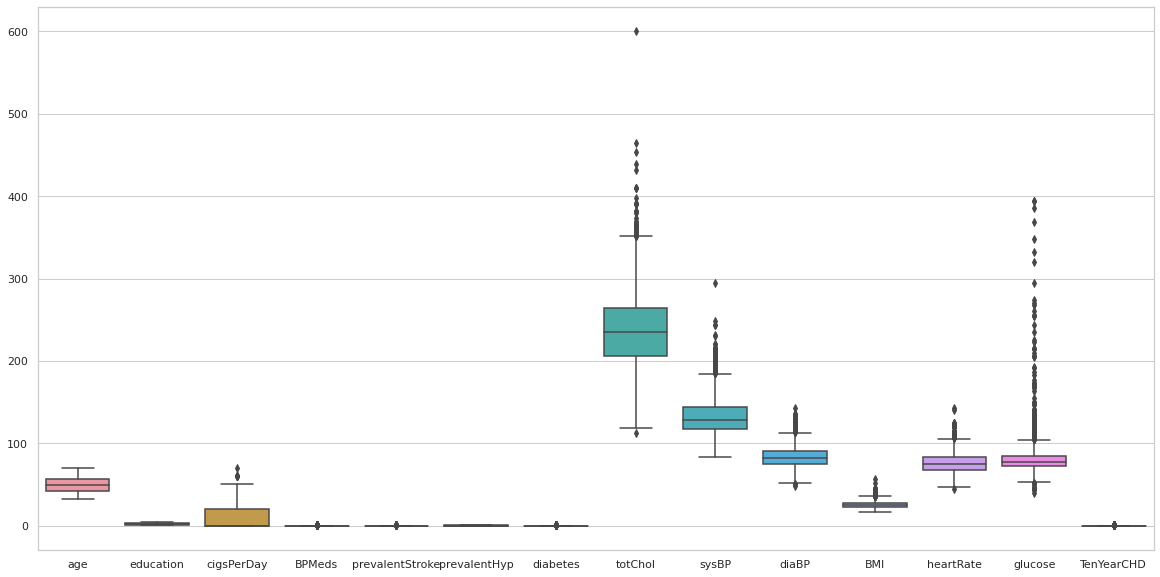

In [20]:
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=hfdf)
plt.show()

Removable Outliers are detected in totChol and sysBP columns of our dataset. Outliers in all other numerical columns are important and thus cannot be removed.

In [21]:
print('The Outlier present in totChol is:', hfdf['totChol'].max())
print('The Outlier present in sysBP is:', hfdf['sysBP'].max())

The Outlier present in totChol is: 600.0
The Outlier present in sysBP is: 295.0


In [22]:
hfdf = hfdf[hfdf['totChol']<600.0]
hfdf = hfdf[hfdf['sysBP']<295.0]
hfdf.shape

(3243, 16)